# Perceptron - solucion con steps

El modelo biológico más simple de un perceptrón es una neurona y viceversa. Es decir, el modelo matemático más simple de una neurona es un perceptrón. La neurona es una célula especializada y caracterizada por poseer una cantidad indefinida de canales de entrada llamados dendritas y un canal de salida llamado axón. Las dendritas operan como sensores que recogen información de la región donde se hallan y la derivan hacia el cuerpo de la neurona que reacciona mediante una sinapsis que envía una respuesta hacia el cerebro.

Una neurona sola y aislada carece de razón de ser. Su labor especializada se torna valiosa en la medida en que se asocia a otras neuronas, formando una red. Normalmente, el axón de una neurona entrega su información como «señal de entrada» a una dendrita de otra neurona y así sucesivamente. El perceptrón que capta la señal en adelante se extiende formando una red de neuronas, sean éstas biológicas o de sustrato semiconductor (compuertas lógicas).

link: https://es.wikipedia.org/wiki/Perceptr%C3%B3n

<img src="https://media.licdn.com/dms/image/v2/C4E12AQEXnAjON3lahQ/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1624840552254?e=2147483647&v=beta&t=idlwgxZEL44s-zyrXWyxbPJmtSjxal7h-d_p0R9gIkg"/>

In [2]:
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
import numpy as np

## Generar data

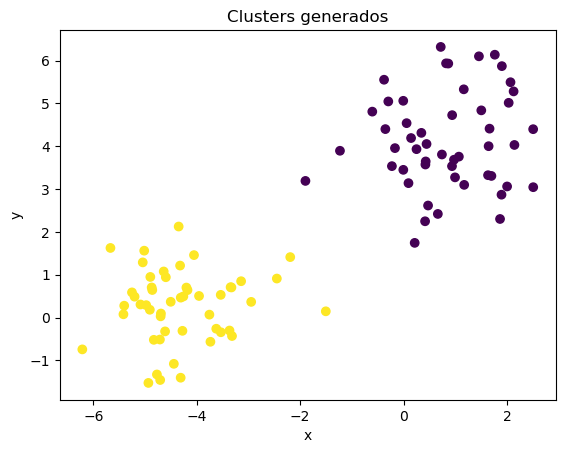

In [4]:
# Generamos 2 clusters, con 300 puntos en total
X, y = make_blobs(n_samples=100, centers=2, cluster_std=1.0, random_state=3)

# X contiene los puntos (x, y), y es la etiqueta del cluster
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Clusters generados")
plt.show()

In [5]:
print( "formato de X: " , X.shape )
print( "ejemplo de X: " , X[0:5] )

formato de X:  (100, 2)
ejemplo de X:  [[-3.75593847  0.06753833]
 [-2.94843418  0.3655385 ]
 [-3.36709068 -0.30343965]
 [ 1.89024377  2.86941982]
 [-4.77040684 -1.33000372]]


In [6]:
print( "formato de y: " , y.shape )
print( "ejemplo de y: " , y[0:5] )

formato de y:  (100,)
ejemplo de y:  [1 1 1 0 1]


## Algoritmo

In [8]:
def function_activation_step(n):
    return 1 if n>=0 else 0

In [9]:
def perceptron(data_x, data_y, max_iterations=1000, learning_rate=0.1):

    data = np.insert(data_x, 0, 1, axis=1)  # Agrega columna bias, inserta values en arr en la posición index, a lo largo del axis que indiques.
    W = np.zeros(data.shape[1])            # Pesos, incluyendo bias

    for iteracion in range(max_iterations):
        
        errores_totales = 0
        
        for i in range(len(data)):
            resultado = np.dot( W , data[i])
            prediccion = function_activation_step(resultado)
            error = data_y[i] - prediccion

            if error != 0:
                # Ajustar pesos
                W += learning_rate * error * data[i]
                errores_totales += 1

        print(f"iteracion({iteracion}) -> {errores_totales} errores")
        if errores_totales == 0:
            break  # Ya clasificó correctamente todo

    return W

iteracion(0) -> 2 errores
iteracion(1) -> 2 errores
iteracion(2) -> 0 errores


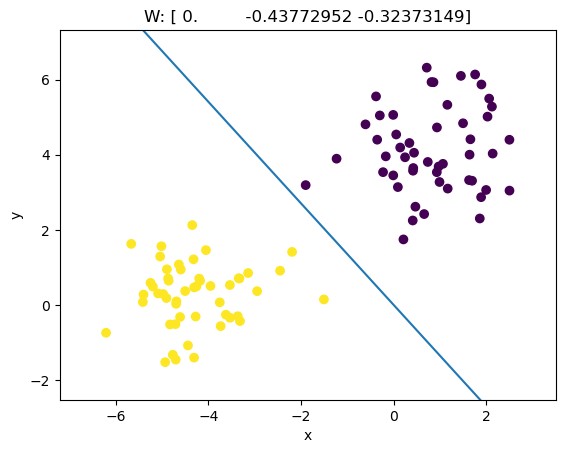

In [10]:
W = perceptron(X,y)

x_min = np.min(X[:, 0])
x_max = np.max(X[:, 0])
y_min = np.min(X[:, 1])
y_max = np.max(X[:, 1])

model_plot_x_range = np.linspace(x_min,x_max,100)

w0 = W[0]
w1 = W[1]
w2 = W[2]

predicciones = -(w1 / w2) * model_plot_x_range - (w0 / w2)

plt.plot( model_plot_x_range, predicciones )
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"W: {W}")
plt.xlim(x_min-1,x_max+1)
plt.ylim(y_min-1,y_max+1)
plt.show()